<a href="https://colab.research.google.com/github/acarolr9/TechnicalCase/blob/main/PruebaTecnicaCarolinaLopezP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entrevista Data Science
### Lectura de librerias

In [2]:
import os

from google.colab import drive

if not os.path.isdir('/content/drive/My Drive'):
    # Montar Google Drive
    drive.mount('/content/drive')
else:
    print("Google Drive ya está montado.")

Google Drive ya está montado.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import time
import json

import sys
from datetime import datetime
import seaborn as sns

import plotly.express as px
import ipywidgets as widgets
from IPython.display import display
import plotly.graph_objects as go

import pickle
import shap


import warnings
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 200)
warnings.filterwarnings('ignore')

from IPython.display import clear_output


### Lecturas Funciones propias

In [4]:
main_path = '/content/drive/My Drive/PruebaTecnica3/'
if main_path not in sys.path:
    sys.path.append(main_path)

In [5]:
from utils_analisis import (
    grafico_torta_interactivo,
    crear_grafico_interactivo
)


#                     1. Explorar las ofertas relámpago, ¿qué insights puedes generar?
---



## Lectura y preprocesing de Información para EDA



In [6]:
# Se lee base
df = pd.read_csv(main_path+'ofertas_relampago.csv',delimiter=',', decimal='.', parse_dates=['OFFER_START_DATE', 'OFFER_START_DTTM', 'OFFER_FINISH_DTTM'])
df.columns = df.columns.str.lower()
df.head(3)

,offer_start_date,offer_start_dttm,offer_finish_dttm,offer_type,involved_stock,remaining_stock_after_end,sold_amount,sold_quantity,origin,shipping_payment_type,dom_domain_agg1,vertical,domain_id
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.0,NaN,none,COMPUTERS,CE,MLM-SPEAKERS


In [7]:
df.dtypes

,0
offer_start_date,datetime64[ns]
offer_start_dttm,"datetime64[ns, UTC]"
offer_finish_dttm,"datetime64[ns, UTC]"
offer_type,object
involved_stock,int64
remaining_stock_after_end,int64
sold_amount,float64
sold_quantity,float64
origin,object
shipping_payment_type,object


In [8]:
df.describe(include='all')

,offer_start_date,offer_start_dttm,offer_finish_dttm,offer_type,involved_stock,remaining_stock_after_end,sold_amount,sold_quantity,origin,shipping_payment_type,dom_domain_agg1,vertical,domain_id
count,48746,48746,48746,48746,48746.000000,48746.000000,24579.000000,24579.000000,11316,48746,48746,48746,48746
unique,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,1,2,36,9,1266
top,NaN,NaN,NaN,lightning_deal,NaN,NaN,NaN,NaN,A,free_shipping,HOME&DECOR,APP & SPORTS,MLM-SURGICAL_AND_INDUSTRIAL_MASKS
freq,NaN,NaN,NaN,48746,NaN,NaN,NaN,NaN,11316,26658,6742,13241,1759
mean,2021-07-05 11:24:49.008328704,2021-07-06 00:35:32.408813056+00:00,2021-07-06 06:18:02.448713984+00:00,NaN,35.007508,30.565216,51.208898,10.851052,NaN,NaN,NaN,NaN,NaN
min,2021-06-01 00:00:00,2021-06-01 07:00:00+00:00,2021-06-01 07:00:00+00:00,NaN,1.000000,-192.000000,0.280000,1.000000,NaN,NaN,NaN,NaN,NaN
25%,2021-06-22 00:00:00,2021-06-22 15:00:00+00:00,2021-06-22 21:22:13+00:00,NaN,5.000000,4.000000,5.730000,1.000000,NaN,NaN,NaN,NaN,NaN
50%,2021-07-07 00:00:00,2021-07-07 18:00:00+00:00,2021-07-08 00:00:00+00:00,NaN,10.000000,8.000000,12.420000,3.000000,NaN,NaN,NaN,NaN,NaN
75%,2021-07-21 00:00:00,2021-07-21 12:00:00+00:00,2021-07-21 15:03:39.750000128+00:00,NaN,15.000000,15.000000,30.925000,6.000000,NaN,NaN,NaN,NaN,NaN
max,2021-07-31 00:00:00,2021-07-31 19:00:00+00:00,2021-08-01 03:00:00+00:00,NaN,9000.000000,8635.000000,4836.570000,1646.000000,NaN,NaN,NaN,NaN,NaN


In [9]:
df.isnull().sum()

,0
offer_start_date,0
offer_start_dttm,0
offer_finish_dttm,0
offer_type,0
involved_stock,0
remaining_stock_after_end,0
sold_amount,24167
sold_quantity,24167
origin,37430
shipping_payment_type,0


#### Se eliminan las columnas offer_type y origin

*   offer_type: Se elimina porque todos sus valores son iguales, por lo que no aporta variabilidad al análisis.
*   origin: Se elimina porque es única, no se conoce el detalle de la misma y, además, presenta un alto porcentaje de valores faltantes.



In [10]:
df.drop(['offer_type', 'origin'], axis=1, inplace=True)

In [11]:
# Se remplazan los NAN por cero tomando en cuenta que son datos que coresponden a las ventas relaciadas en la oferta
df.fillna(0, inplace=True)

In [12]:
## Se crea variables relacionada a la duracion de la oferta
df['offer_start_dttm'] = pd.to_datetime(df['offer_start_dttm']).dt.tz_localize(None)
df['offer_finish_dttm'] = pd.to_datetime(df['offer_finish_dttm']).dt.tz_localize(None)
df['offer_duration_min'] = (df['offer_finish_dttm'] - df['offer_start_date']).dt.total_seconds() / 60


In [13]:
## Se crea variable relacionada a el porcentaje del inventario que se vendio
df['sold_percentage'] = ((df['involved_stock'] - df['remaining_stock_after_end']) / df['involved_stock']) * 100

## Crear nuevas columnas de hora y dia que se realiza la oferta
df['hour'] = df['offer_start_dttm'].dt.hour
df['weekday'] = df['offer_start_date'].dt.day_name()

In [14]:
df.head(3)

,offer_start_date,offer_start_dttm,offer_finish_dttm,involved_stock,remaining_stock_after_end,sold_amount,sold_quantity,shipping_payment_type,dom_domain_agg1,vertical,domain_id,offer_duration_min,sold_percentage,hour,weekday
0,2021-06-22,2021-06-22 16:00:00,2021-06-22 23:02:43,4,-2,4.72,6.0,none,PETS FOOD,CPG,MLM-BIRD_FOODS,1382.716667,150.0,16,Tuesday
1,2021-06-22,2021-06-22 13:00:00,2021-06-22 19:00:02,5,5,0.00,0.0,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS,1140.033333,0.0,13,Tuesday
2,2021-06-22,2021-06-22 07:00:00,2021-06-22 13:00:01,15,12,10.73,3.0,none,COMPUTERS,CE,MLM-SPEAKERS,780.016667,20.0,7,Tuesday


## Insights de data

In [15]:
# funcion para analizar ventas
grafico_torta_interactivo(df)

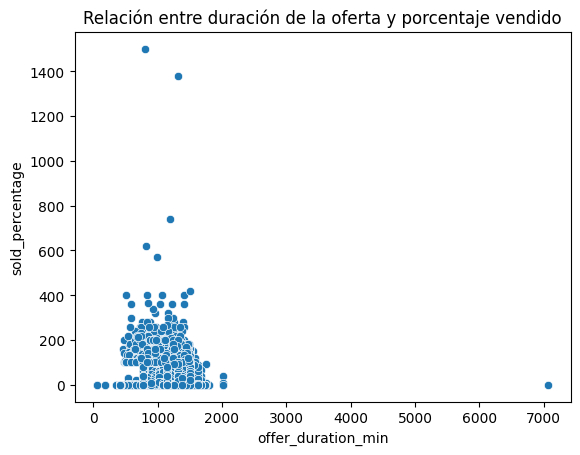

In [16]:

sns.scatterplot(data=df, x='offer_duration_min', y='sold_percentage')
plt.title('Relación entre duración de la oferta y porcentaje vendido')
plt.show()

In [17]:
fig = go.Figure()
for vertical in df['vertical'].unique():
    data = df[df['vertical'] == vertical]
    fig.add_trace(go.Scatter(
        x=data['involved_stock'],
        y=data['sold_amount'],
        mode='markers',
        name=vertical
    ))

fig.update_layout(
    title='Comparación de Stock Involucrado vs. Cantidad Vendida',
    xaxis_title='Stock Involucrado',
    yaxis_title='Cantidad Vendida',
    legend_title='Categoría'
)
fig.show()

In [18]:
# Gráfico de inventario restante por categoría
fig_inventory = px.bar(
    df.groupby('vertical').agg(avg_remaining_stock=('remaining_stock_after_end', 'mean')).reset_index(),
    x='vertical', y='avg_remaining_stock',
    title='Inventario Promedio Restante por Categoría',
    labels={'vertical': 'Categoría', 'avg_remaining_stock': 'Inventario Promedio Restante'}
)
fig_inventory.show()

In [19]:
# Gebnara analisis de tiempos
crear_grafico_interactivo(df, eje_x='hour', columna_filtro='vertical', eje_y='sold_amount')


In [20]:
crear_grafico_interactivo(df, eje_x='weekday', columna_filtro='vertical', eje_y='sold_amount')

In [21]:
crear_grafico_interactivo(df, eje_x='weekday', columna_filtro='dom_domain_agg1', eje_y='sold_amount')